In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('economic_index.csv')

In [4]:
data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
data.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)

In [8]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
data.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

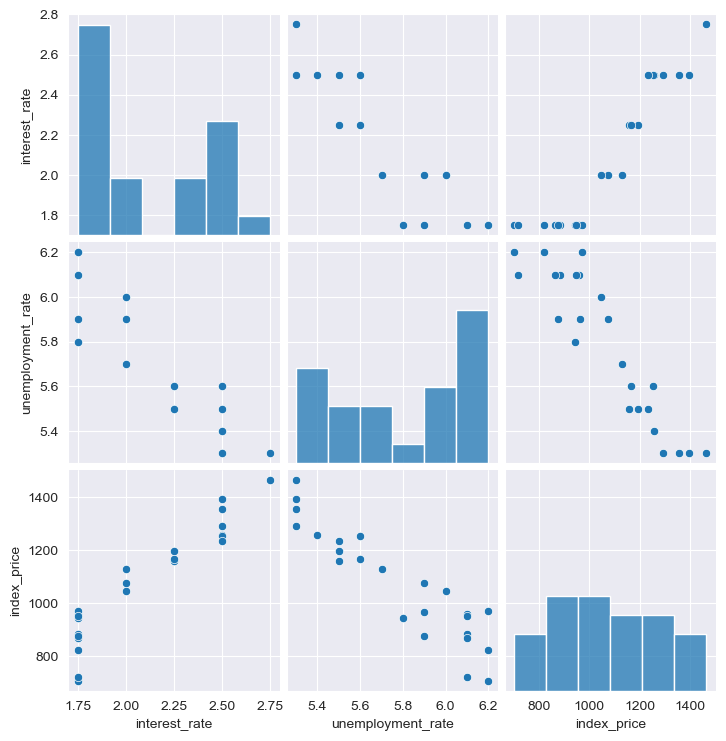

In [10]:
sns.pairplot(data)
plt.show()

In [7]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [11]:
data.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

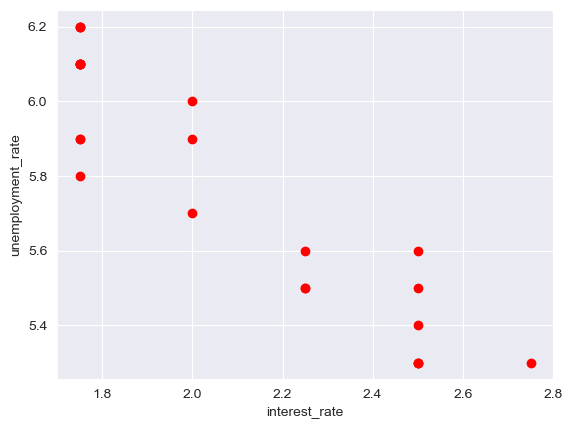

In [13]:
## Visualization
plt.scatter(data["interest_rate"],data["unemployment_rate"],color="red")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [14]:
X = data.drop(["index_price"],axis=1)
y = data["index_price"]

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
y

<bound method NDFrame.head of 0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64>

In [19]:
# spliting the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


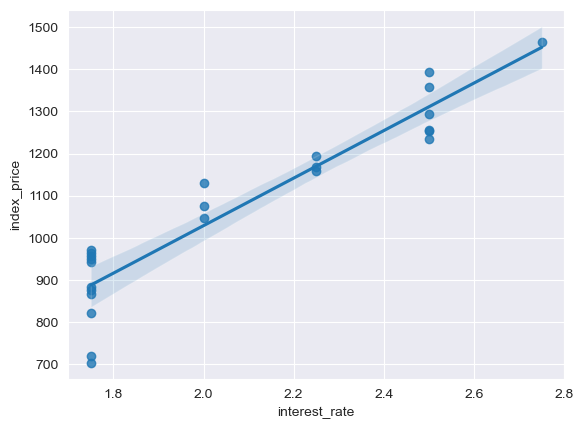

In [22]:

sns.regplot(x=data['interest_rate'],y=data['index_price'])
plt.show()

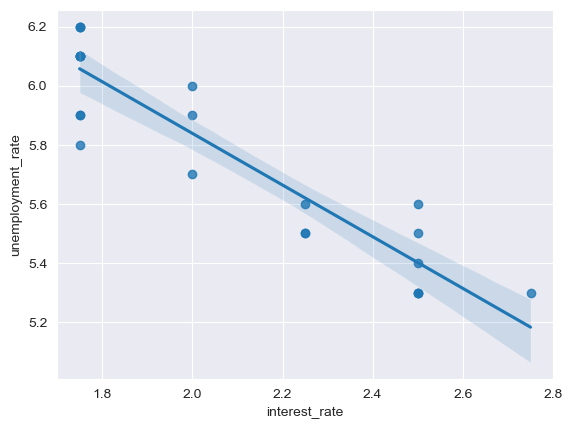

In [23]:

sns.regplot(x=data['interest_rate'],y=data['unemployment_rate'])
plt.show()

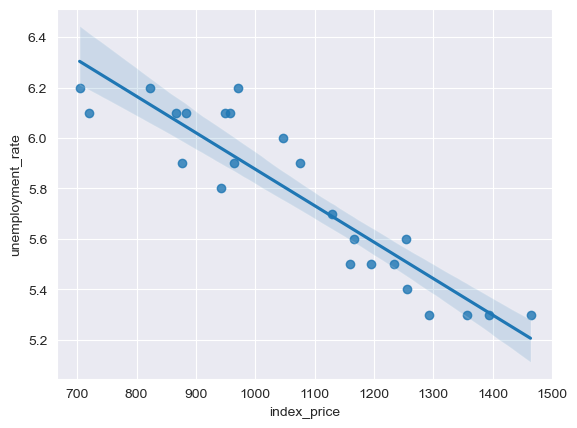

In [24]:

sns.regplot(x=data['index_price'],y=data['unemployment_rate'])
plt.show()

In [25]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [26]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = reg.predict(X_test)

In [28]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.7628877125835
59.93578152323554
76.11677139574815


In [30]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [31]:
print(val_score)

[-1861.74046551 -8715.8459466  -7707.52362191 -9169.13776461
  -791.32842311]


In [32]:
np.mean(val_score)

-5649.115244350771

In [33]:

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457141
0.7131630152428567


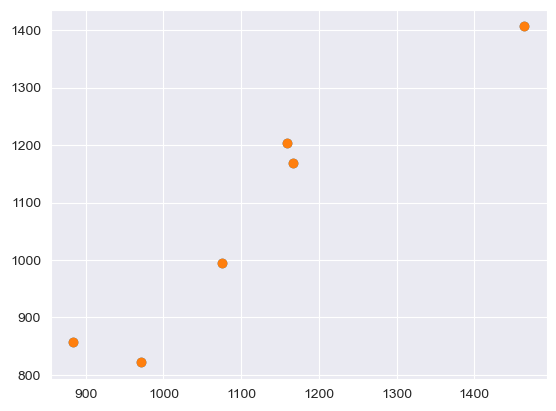

In [35]:
plt.scatter(y_test,y_pred)
plt.show()

In [36]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


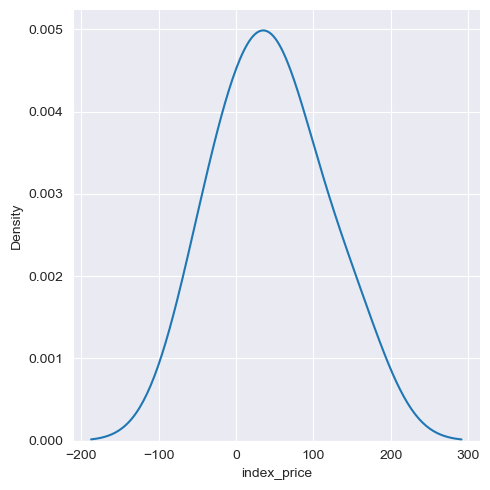

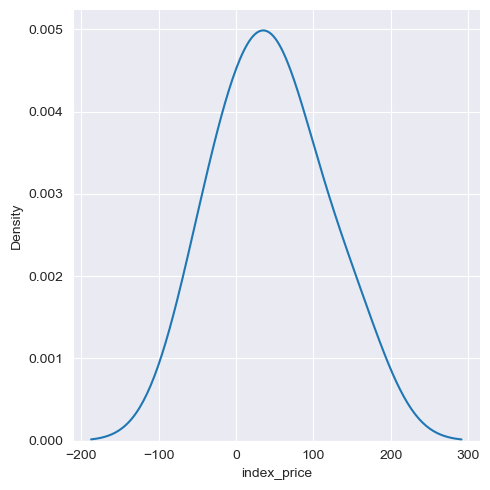

In [38]:

## Plot this residuals
sns.displot(residuals,kind='kde')
plt.show()

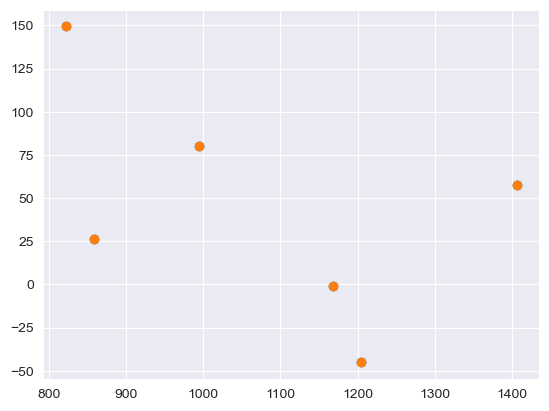

In [40]:

## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
plt.show()

In [43]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):                    7.46e-19
Time:                        21:39:56   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/Users/sushant/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [44]:
reg.coef_

array([ 260.33709119, -360.58377051])